In [112]:
pip install beautifulsoup4 lxml numpy requests


Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [113]:
import requests
from bs4 import BeautifulSoup

def fetch_html(url):
    response = requests.get(url)
    return response.text

html = fetch_html('https://en.wikipedia.org/wiki/Web_scraping')  # или другой сайт
soup = BeautifulSoup(html, 'lxml')

print(soup.prettify()[:1000])  # Посмотрим начало дерева


<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Web scraping - Wikipedia
  </title>
  <script>
   (function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-en

In [114]:
import requests
from bs4 import BeautifulSoup
from collections import Counter
import math

# 1. Загрузка страницы
def fetch_html(url):
    response = requests.get(url)
    return response.text

# 2. Вычисление символьной энтропии
def calculate_entropy(text):
    if not text:
        return 0.0
    counter = Counter(text)
    total = sum(counter.values())
    return -sum((count / total) * math.log2(count / total) for count in counter.values())

# 3. Анализ DOM-блоков с вычислением взвешенной энтропии
def analyze_weighted_entropy(soup, alpha=0.6):
    tags = ['p', 'div', 'section']
    blocks = soup.find_all(tags)

    intermediate = []

    for block in blocks:
        text = block.get_text(strip=True)
        length = len(text)
        if length > 50:
            entropy = calculate_entropy(text)
            intermediate.append({'text': text, 'length': length, 'entropy': entropy})

    if not intermediate:
        return []

    max_length = max(block['length'] for block in intermediate)

    results = []
    for block in intermediate:
        norm_length = block['length'] / max_length
        weighted_entropy = (norm_length ** alpha) * block['entropy']
        results.append((weighted_entropy, block['entropy'], block['length'], block['text'][:100]))

    return sorted(results, reverse=True)

# 4. Применение
url = 'https://en.wikipedia.org'
html = fetch_html(url)
soup = BeautifulSoup(html, 'lxml')
results = analyze_weighted_entropy(soup)

# 5. Вывод результатов

print("\nTop 40 text blocks with the highest length-weighted entropy (extracted from Wikipedia):\n")
for i, (h_w, h, l, snippet) in enumerate(results[:40], 1):
    print(f"{i}. H_w: {h_w:.2f} | H: {h:.2f} | Length: {l} | TEXT: {snippet}...")


Top 40 text blocks with the highest length-weighted entropy (extracted from Wikipedia):

1. H_w: 5.01 | H: 5.01 | Length: 9033 | TEXT: Main PageMain PageTalkEnglishReadView sourceView historyToolsToolsmove to sidebarhideActionsReadView...
2. H_w: 5.01 | H: 5.01 | Length: 9033 | TEXT: Main PageMain PageTalkEnglishReadView sourceView historyToolsToolsmove to sidebarhideActionsReadView...
3. H_w: 4.86 | H: 5.02 | Length: 8585 | TEXT: Main PageMain PageTalkEnglishReadView sourceView historyToolsToolsmove to sidebarhideActionsReadView...
4. H_w: 4.68 | H: 5.02 | Length: 8043 | TEXT: From Wikipedia, the free encyclopediaWelcome toWikipedia,thefreeencyclopediathatanyone can edit.111,...
5. H_w: 4.42 | H: 4.91 | Length: 7586 | TEXT: Welcome toWikipedia,thefreeencyclopediathatanyone can edit.111,866active editors7,011,005articles in...
6. H_w: 4.37 | H: 4.89 | Length: 7500 | TEXT: Welcome toWikipedia,thefreeencyclopediathatanyone can edit.111,866active editors7,011,005articles in...
7. H_w: 2.

In [115]:
from bs4 import BeautifulSoup
import requests
from collections import Counter
import math

def fetch_html(url):
    return requests.get(url).text

def calculate_entropy(text):
    counter = Counter(text)
    total = sum(counter.values())
    return -sum((count / total) * math.log2(count / total) for count in counter.values()) if total else 0.0

def analyze_blocks(html, min_length=50):
    soup = BeautifulSoup(html, 'lxml')
    tags = ['p', 'div', 'section']
    blocks = soup.find_all(tags)

    block_lengths = []
    for block in blocks:
        text = block.get_text(strip=True)
        if len(text) > min_length:
            block_lengths.append(len(text))
    return block_lengths



In [116]:
url = 'https://en.wikipedia.org'
html = fetch_html(url)
lengths = analyze_blocks(html)

num_blocks = len(lengths)
avg_length = sum(lengths) / num_blocks if num_blocks > 0 else 0

print(f"Number of blocks: {num_blocks}")
print(f"Average block length: {avg_length:.1f}")


Number of blocks: 69
Average block length: 1178.4


In [117]:
import requests
from bs4 import BeautifulSoup
from collections import Counter
import math

# 1. Загрузка страницы
def fetch_html(url):
    response = requests.get(url)
    return response.text

# 2. Вычисление символьной энтропии
def calculate_entropy(text):
    if not text:
        return 0.0
    counter = Counter(text)
    total = sum(counter.values())
    return -sum((count / total) * math.log2(count / total) for count in counter.values())

# 3. Анализ DOM-блоков с вычислением взвешенной энтропии
def analyze_weighted_entropy(soup, alpha=0.6):
    tags = ['p', 'div', 'section']
    blocks = soup.find_all(tags)

    intermediate = []

    for block in blocks:
        text = block.get_text(strip=True)
        length = len(text)
        if length >= 50:
            entropy = calculate_entropy(text)
            intermediate.append({'text': text, 'length': length, 'entropy': entropy})

    if not intermediate:
        return []

    max_length = max(block['length'] for block in intermediate)

    results = []
    for block in intermediate:
        norm_length = block['length'] / max_length
        weighted_entropy = (norm_length ** alpha) * block['entropy']
        results.append((weighted_entropy, block['entropy'], block['length'], block['text'][:100]))

    # сортировка по возрастанию H_w
    return sorted(results, key=lambda x: x[0])

# 4. Применение
url = 'https://en.wikipedia.org'
html = fetch_html(url)
soup = BeautifulSoup(html, 'lxml')
results = analyze_weighted_entropy(soup)

# 5. Вывод top-40 с наименьшей взвешенной энтропией
print("\nTop-40 text blocks with the lowest length-weighted entropy (from Wikipedia):\n")
for i, (h_w, h, l, snippet) in enumerate(results[:40], 1):
    print(f"{i}. H_w: {h_w:.2f} | H: {h:.2f} | L: {l} | TEXT: {snippet}...")





Top-40 text blocks with the lowest length-weighted entropy (from Wikipedia):

1. H_w: 0.19 | H: 4.05 | L: 55 | TEXT: Pages for logged out editorslearn moreContributionsTalk...
2. H_w: 0.21 | H: 4.33 | L: 58 | TEXT: Recently featured:Ian CarmichaelRusset sparrowEmmy Noether...
3. H_w: 0.21 | H: 4.42 | L: 57 | TEXT: Painting credit: Louis Schultze, after John H. Fitzgibbon...
4. H_w: 0.22 | H: 4.06 | L: 69 | TEXT: Gaza warRussian invasion of UkrainetimelineSudanese civil wartimeline...
5. H_w: 0.22 | H: 4.38 | L: 61 | TEXT: Recently featured:Garni TempleIgor StravinskySabella pavonina...
6. H_w: 0.23 | H: 4.20 | L: 70 | TEXT: Main pageContentsCurrent eventsRandom articleAbout WikipediaContact us...
7. H_w: 0.23 | H: 4.27 | L: 71 | TEXT: HelpLearn to editCommunity portalRecent changesUpload fileSpecial pages...
8. H_w: 0.24 | H: 4.19 | L: 77 | TEXT: Ongoing:Gaza warRussian invasion of UkrainetimelineSudanese civil wartimeline...
9. H_w: 0.24 | H: 4.13 | L: 81 | TEXT: DonateCreate account

In [118]:
import requests
from bs4 import BeautifulSoup
from collections import Counter
import math
from pathlib import Path

# 1. Загрузка локального HTML-файла
def load_local_html(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        return f.read()

# 2. Вычисление символьной энтропии
def calculate_entropy(text):
    if not text:
        return 0.0
    counter = Counter(text)
    total = sum(counter.values())
    return -sum((count / total) * math.log2(count / total) for count in counter.values())

# 3. Анализ DOM-блоков с вычислением взвешенной энтропии
def analyze_weighted_entropy(soup, alpha=0.6):
    tags = ['p', 'div', 'section']
    blocks = soup.find_all(tags)

    intermediate = []

    for block in blocks:
        text = block.get_text(strip=True)
        length = len(text)
        if length > 50:
            entropy = calculate_entropy(text)
            intermediate.append({'text': text, 'length': length, 'entropy': entropy})

    if not intermediate:
        return []

    max_length = max(block['length'] for block in intermediate)

    results = []
    for block in intermediate:
        norm_length = block['length'] / max_length
        weighted_entropy = (norm_length ** alpha) * block['entropy']
        results.append((weighted_entropy, block['entropy'], block['length'], block['text'][:100]))

    return sorted(results, reverse=True)

# 4. Применение к локальному файлу
file_path = Path.home() / 'ASA' / 'arXiv.org e-Print archive.html'
html = load_local_html(file_path)
soup = BeautifulSoup(html, 'lxml')
results = analyze_weighted_entropy(soup)

# 5. Вывод результатов
print("\nTop 40 text blocks with the highest length-weighted entropy (extracted from ArXiv):\n")
for i, (h_w, h, l, snippet) in enumerate(results[:40], 1):
    print(f"{i}. H_w: {h_w:.2f} | H: {h:.2f} | Length: {l} | TEXT: {snippet}...")






Top 40 text blocks with the highest length-weighted entropy (extracted from ArXiv):

1. H_w: 4.76 | H: 4.76 | Length: 5679 | TEXT: Skip to main contentWe gratefully acknowledge support from the Simons Foundation,member institutions...
2. H_w: 4.43 | H: 4.75 | Length: 5064 | TEXT: arXiv is a free distribution service and an open-access archive for nearly 2.4 million
      scholar...
3. H_w: 1.02 | H: 4.36 | Length: 505 | TEXT: arXiv is a free distribution service and an open-access archive for nearly 2.4 million
      scholar...
4. H_w: 1.02 | H: 4.36 | Length: 505 | TEXT: arXiv is a free distribution service and an open-access archive for nearly 2.4 million
      scholar...
5. H_w: 0.78 | H: 4.21 | Length: 344 | TEXT: arXiv is a free distribution service and an open-access archive for nearly 2.4 million
      scholar...
6. H_w: 0.64 | H: 4.35 | Length: 230 | TEXT: AboutHelpcontact arXivClick here to contact arXivContactsubscribe to arXiv mailingsClick here to sub...
7. H_w: 0.62 | H: 

In [119]:
from bs4 import BeautifulSoup
from collections import Counter
from pathlib import Path
import math

# 1. Загрузка локального HTML-файла
def load_local_html(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        return f.read()

# 2. Подсчёт длины блоков
def analyze_blocks(html, min_length=50):
    soup = BeautifulSoup(html, 'lxml')
    tags = ['p', 'div', 'section']
    blocks = soup.find_all(tags)

    block_lengths = []
    for block in blocks:
        text = block.get_text(strip=True)
        if len(text) > min_length:
            block_lengths.append(len(text))
    return block_lengths

# 3. Применение
file_path = Path.home() / 'ASA' / 'arXiv.org e-Print archive.html'
html = load_local_html(file_path)
lengths = analyze_blocks(html)

# 4. Статистика
num_blocks = len(lengths)
avg_length = sum(lengths) / num_blocks if num_blocks > 0 else 0

print(f"Number of blocks: {num_blocks}")
print(f"Average block length: {avg_length:.1f}")


Number of blocks: 23
Average block length: 623.8


In [121]:
import requests
from bs4 import BeautifulSoup
from collections import Counter
import math
from pathlib import Path

# 1. Загрузка локального HTML-файла
def load_local_html(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        return f.read()

# 2. Вычисление символьной энтропии
def calculate_entropy(text):
    if not text:
        return 0.0
    counter = Counter(text)
    total = sum(counter.values())
    return -sum((count / total) * math.log2(count / total) for count in counter.values())

# 3. Анализ DOM-блоков с вычислением взвешенной энтропии
def analyze_weighted_entropy(soup, alpha=0.6):
    tags = ['p', 'div', 'section']
    blocks = soup.find_all(tags)

    intermediate = []

    for block in blocks:
        text = block.get_text(strip=True)
        length = len(text)
        if length >=50:  # можно снизить до 30, если слишком мало блоков
            entropy = calculate_entropy(text)
            intermediate.append({'text': text, 'length': length, 'entropy': entropy})

    print(f"Всего блоков после фильтрации по длине > 50: {len(intermediate)}")

    if not intermediate:
        return []

    max_length = max(block['length'] for block in intermediate)

    results = []
    for block in intermediate:
        norm_length = block['length'] / max_length
        weighted_entropy = (norm_length ** alpha) * block['entropy']
        results.append((weighted_entropy, block['entropy'], block['length'], block['text'][:100]))

    return sorted(results, key=lambda x: x[0])  # сортировка по возрастанию

# 4. Применение к локальному файлу
file_path = Path.home() / 'ASA' / 'arXiv.org e-Print archive.html'
html = load_local_html(file_path)
soup = BeautifulSoup(html, 'lxml')
results = analyze_weighted_entropy(soup)

# 5. Дополнительно: если блоков меньше 40, добиваем до 40 пустыми
top_n = 40
while len(results) < top_n:
    results.append((0.0, 0.0, 0, "[EMPTY BLOCK]"))
# Сортировка по возрастанию (от наименьшего H_w к большему)
results_sorted = sorted(results, key=lambda x: x[0])[:40]

# Вывод
print("\nTop 40 text blocks with the lowest length-weighted entropy (from lowest to highest):\n")
for i, (h_w, h, l, snippet) in enumerate(results_sorted, 1):
    print(f"{i}. H_w: {h_w:.2f} | H: {h:.2f} | Length: {l} | TEXT: {snippet}...")




Всего блоков после фильтрации по длине > 50: 23

Top 40 text blocks with the lowest length-weighted entropy (from lowest to highest):

1. H_w: 0.00 | H: 0.00 | Length: 0 | TEXT: [EMPTY BLOCK]...
2. H_w: 0.00 | H: 0.00 | Length: 0 | TEXT: [EMPTY BLOCK]...
3. H_w: 0.00 | H: 0.00 | Length: 0 | TEXT: [EMPTY BLOCK]...
4. H_w: 0.00 | H: 0.00 | Length: 0 | TEXT: [EMPTY BLOCK]...
5. H_w: 0.00 | H: 0.00 | Length: 0 | TEXT: [EMPTY BLOCK]...
6. H_w: 0.00 | H: 0.00 | Length: 0 | TEXT: [EMPTY BLOCK]...
7. H_w: 0.00 | H: 0.00 | Length: 0 | TEXT: [EMPTY BLOCK]...
8. H_w: 0.00 | H: 0.00 | Length: 0 | TEXT: [EMPTY BLOCK]...
9. H_w: 0.00 | H: 0.00 | Length: 0 | TEXT: [EMPTY BLOCK]...
10. H_w: 0.00 | H: 0.00 | Length: 0 | TEXT: [EMPTY BLOCK]...
11. H_w: 0.00 | H: 0.00 | Length: 0 | TEXT: [EMPTY BLOCK]...
12. H_w: 0.00 | H: 0.00 | Length: 0 | TEXT: [EMPTY BLOCK]...
13. H_w: 0.00 | H: 0.00 | Length: 0 | TEXT: [EMPTY BLOCK]...
14. H_w: 0.00 | H: 0.00 | Length: 0 | TEXT: [EMPTY BLOCK]...
15. H_w: 0.00 | H: 0

In [122]:
import requests
from bs4 import BeautifulSoup
from collections import Counter
import math
from pathlib import Path

# 0. Загрузка HTML-страницы с сайта
def fetch_html(url):
    response = requests.get(url)
    return response.text

# 1. Вычисление символьной энтропии
def calculate_entropy(text):
    if not text:
        return 0.0
    counter = Counter(text)
    total = sum(counter.values())
    return -sum((count / total) * math.log2(count / total) for count in counter.values())

# 2. Анализ DOM-блоков с вычислением взвешенной энтропии
def analyze_weighted_entropy(soup, alpha=0.6):
    tags = ['p', 'div', 'section']
    blocks = soup.find_all(tags)

    intermediate = []

    for block in blocks:
        text = block.get_text(strip=True)
        length = len(text)
        if length > 50:
            entropy = calculate_entropy(text)
            intermediate.append({'text': text, 'length': length, 'entropy': entropy})

    if not intermediate:
        return []

    max_length = max(block['length'] for block in intermediate)

    results = []
    for block in intermediate:
        norm_length = block['length'] / max_length
        weighted_entropy = (norm_length ** alpha) * block['entropy']
        results.append((weighted_entropy, block['entropy'], block['length'], block['text'][:100]))

    return sorted(results, reverse=True)

# 3. Применение к онлайн-странице Quotes to Scrape
url = 'https://quotes.toscrape.com'
html = fetch_html(url)
soup = BeautifulSoup(html, 'lxml')
results = analyze_weighted_entropy(soup)

# 4. Вывод результатов
print("\nTop 40 text blocks with the highest length-weighted entropy (extracted from Quotes):\n")
for i, (h_w, h, l, snippet) in enumerate(results[:40], 1):
    print(f"{i}. H_w: {h_w:.2f} | H: {h:.2f} | Length: {l} | TEXT: {snippet}...")



Top 40 text blocks with the highest length-weighted entropy (extracted from Quotes):

1. H_w: 4.65 | H: 4.65 | Length: 1525 | TEXT: Quotes to ScrapeLogin“The world as we have created it is a process of our thinking. It cannot be cha...
2. H_w: 4.60 | H: 4.64 | Length: 1504 | TEXT: “The world as we have created it is a process of our thinking. It cannot be changed without changing...
3. H_w: 4.46 | H: 4.64 | Length: 1426 | TEXT: “The world as we have created it is a process of our thinking. It cannot be changed without changing...
4. H_w: 1.26 | H: 4.33 | Length: 196 | TEXT: “There are only two ways to live your life. One is as though nothing is a miracle. The other is as t...
5. H_w: 1.21 | H: 4.43 | Length: 176 | TEXT: “The world as we have created it is a process of our thinking. It cannot be changed without changing...
6. H_w: 1.15 | H: 4.40 | Length: 163 | TEXT: “Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolute...
7. H_w: 1.13 | H

In [123]:
from bs4 import BeautifulSoup
from collections import Counter
import requests
import math

# 1. Загрузка HTML-страницы с сайта
def fetch_html(url):
    response = requests.get(url)
    return response.text

# 2. Подсчёт длины блоков
def analyze_blocks(html, min_length=50):
    soup = BeautifulSoup(html, 'lxml')
    tags = ['p', 'div', 'section']
    blocks = soup.find_all(tags)

    block_lengths = []
    for block in blocks:
        text = block.get_text(strip=True)
        if len(text) > min_length:
            block_lengths.append(len(text))
    return block_lengths

# 3. Применение к сайту Quotes
url = 'https://quotes.toscrape.com'
html = fetch_html(url)
lengths = analyze_blocks(html)

# 4. Статистика
num_blocks = len(lengths)
avg_length = sum(lengths) / num_blocks if num_blocks > 0 else 0

print(f"Number of blocks: {num_blocks}")
print(f"Average block length: {avg_length:.1f}")


Number of blocks: 14
Average block length: 425.3


In [124]:
import requests
from bs4 import BeautifulSoup
from collections import Counter
import math

# 1. Загрузка HTML со страницы quotes.toscrape.com
def fetch_html(url):
    return requests.get(url).text

# 2. Вычисление символьной энтропии
def calculate_entropy(text):
    counter = Counter(text)
    total = sum(counter.values())
    return -sum((count / total) * math.log2(count / total) for count in counter.values()) if total else 0.0

# 3. Анализ DOM-блоков: считаем взвешенную энтропию
def analyze_lowest_weighted_entropy(html, alpha=0.6, top_n=40, min_length=50):
    soup = BeautifulSoup(html, 'lxml')
    tags = ['p', 'div', 'section']
    blocks = soup.find_all(tags)

    intermediate = []
    for block in blocks:
        text = block.get_text(strip=True)
        length = len(text)
        if length >= min_length:
            entropy = calculate_entropy(text)
            intermediate.append({'text': text, 'length': length, 'entropy': entropy})

    print(f"Всего блоков после фильтрации: {len(intermediate)}")

    if not intermediate:
        return []

    max_length = max(block['length'] for block in intermediate)

    results = []
    for block in intermediate:
        norm_length = block['length'] / max_length
        weighted_entropy = (norm_length ** alpha) * block['entropy']
        results.append((weighted_entropy, block['entropy'], block['length'], block['text'][:100]))

    return sorted(results, key=lambda x: x[0])[:top_n]

# 4. Применение к сайту quotes.toscrape.com
url = 'https://quotes.toscrape.com'
html = fetch_html(url)
results = analyze_lowest_weighted_entropy(html)

# 5. Вывод
if not results:
    print("\nНет подходящих блоков. Энтропия равна нулю.\n")
else:
    print("\nTop 40 text blocks with the lowest length-weighted entropy (Quotes to Scrape):\n")
    for i, (h_w, h, l, snippet) in enumerate(results, 1):
        print(f"{i}. H_w: {h_w:.2f} | H: {h:.2f} | Length: {l} | TEXT: {snippet}...")




Всего блоков после фильтрации: 14

Top 40 text blocks with the lowest length-weighted entropy (Quotes to Scrape):

1. H_w: 0.69 | H: 4.13 | Length: 78 | TEXT: Top Ten tagsloveinspirationallifehumorbooksreadingfriendshipfriendstruthsimile...
2. H_w: 0.86 | H: 4.55 | Length: 94 | TEXT: “A day without sunshine is like, you know, night.”bySteve Martin(about)Tags:humorobvioussimile...
3. H_w: 0.90 | H: 4.27 | Length: 114 | TEXT: “It is better to be hated for what you are than to be loved for what you are not.”byAndré Gide(about...
4. H_w: 0.95 | H: 4.41 | Length: 117 | TEXT: “Try not to become a man of success. Rather become a man of value.”byAlbert Einstein(about)Tags:adul...
5. H_w: 1.01 | H: 4.47 | Length: 127 | TEXT: “It is our choices, Harry, that show what we truly are, far more than our abilities.”byJ.K. Rowling(...
6. H_w: 1.08 | H: 4.39 | Length: 147 | TEXT: “A woman is like a tea bag; you never know how strong it is until it's in hot water.”byEleanor Roose...
7. H_w: 1.09 | H: 4.7

In [125]:
import requests
from bs4 import BeautifulSoup
from collections import Counter
import math
from pathlib import Path

# 1. Загрузка локального HTML-файла
def load_local_html(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        return f.read()

# 2. Вычисление символьной энтропии
def calculate_entropy(text):
    if not text:
        return 0.0
    counter = Counter(text)
    total = sum(counter.values())
    return -sum((count / total) * math.log2(count / total) for count in counter.values())

# 3. Анализ DOM-блоков с вычислением взвешенной энтропии
def analyze_weighted_entropy(soup, alpha=0.6):
    tags = ['p', 'div', 'section']
    blocks = soup.find_all(tags)

    intermediate = []

    for block in blocks:
        text = block.get_text(strip=True)
        length = len(text)
        if length > 50:
            entropy = calculate_entropy(text)
            intermediate.append({'text': text, 'length': length, 'entropy': entropy})

    if not intermediate:
        return []

    max_length = max(block['length'] for block in intermediate)

    results = []
    for block in intermediate:
        norm_length = block['length'] / max_length
        weighted_entropy = (norm_length ** alpha) * block['entropy']
        results.append((weighted_entropy, block['entropy'], block['length'], block['text'][:100]))

    return sorted(results, reverse=True)

# 4. Применение к локальному файлу
file_path = Path.home() /'ASA/BBC News.html'
html = load_local_html(file_path)
soup = BeautifulSoup(html, 'lxml')
results = analyze_weighted_entropy(soup)

# 5. Вывод результатов
print("\nTop 40 text blocks with the highest length-weighted entropy (extracted from BBC news):\n")
for i, (h_w, h, l, snippet) in enumerate(results[:40], 1):
    print(f"{i}. H_w: {h_w:.2f} | H: {h:.2f} | Length: {l} | TEXT: {snippet}...")


Top 40 text blocks with the highest length-weighted entropy (extracted from BBC news):

1. H_w: 4.69 | H: 4.69 | Length: 10857 | TEXT: Skip to contentBritish Broadcasting CorporationHomeNewsSportBusinessInnovationCultureArtsTravelEarth...
2. H_w: 4.69 | H: 4.69 | Length: 10857 | TEXT: Skip to contentBritish Broadcasting CorporationHomeNewsSportBusinessInnovationCultureArtsTravelEarth...
3. H_w: 1.64 | H: 4.67 | Length: 1898 | TEXT: LIVEIndia and Pakistan accuse each other of drone strikes as tensions mountThe fresh accusations com...
4. H_w: 1.64 | H: 4.67 | Length: 1898 | TEXT: LIVEIndia and Pakistan accuse each other of drone strikes as tensions mountThe fresh accusations com...
5. H_w: 1.64 | H: 4.67 | Length: 1898 | TEXT: LIVEIndia and Pakistan accuse each other of drone strikes as tensions mountThe fresh accusations com...
6. H_w: 1.62 | H: 4.59 | Length: 1921 | TEXT: Sport'Clock ticking on Arteta to prove he can be a winner'The clock is ticking for Arsenal and manag...
7. H_w: 1

In [126]:
from bs4 import BeautifulSoup
from collections import Counter
from pathlib import Path
import math

# 1. Загрузка локального HTML-файла
def load_local_html(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        return f.read()

# 2. Подсчёт длины блоков
def analyze_blocks(html, min_length=50):
    soup = BeautifulSoup(html, 'lxml')
    tags = ['p', 'div', 'section']
    blocks = soup.find_all(tags)

    block_lengths = []
    for block in blocks:
        text = block.get_text(strip=True)
        if len(text) > min_length:
            block_lengths.append(len(text))
    return block_lengths

# 3. Применение
file_path = Path.home() /'ASA/BBC News.html'
html = load_local_html(file_path)
lengths = analyze_blocks(html)

# 4. Статистика
num_blocks = len(lengths)
avg_length = sum(lengths) / num_blocks if num_blocks > 0 else 0

print(f"Number of blocks: {num_blocks}")
print(f"Average block length: {avg_length:.1f}")

Number of blocks: 409
Average block length: 256.0


In [128]:
import requests
from bs4 import BeautifulSoup
from collections import Counter
import math
from pathlib import Path

# 1. Загрузка локального HTML-файла
def load_local_html(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        return f.read()

# 2. Вычисление символьной энтропии
def calculate_entropy(text):
    if not text:
        return 0.0
    counter = Counter(text)
    total = sum(counter.values())
    return -sum((count / total) * math.log2(count / total) for count in counter.values())

# 3. Анализ DOM-блоков с вычислением взвешенной энтропии
def analyze_weighted_entropy(soup, alpha=0.6):
    tags = ['p', 'div', 'section']
    blocks = soup.find_all(tags)

    intermediate = []

    for block in blocks:
        text = block.get_text(strip=True)
        length = len(text)
        if length >= 50:  # можно снизить до 30, если слишком мало блоков
            entropy = calculate_entropy(text)
            intermediate.append({'text': text, 'length': length, 'entropy': entropy})

    print(f"Всего блоков после фильтрации по длине > 50: {len(intermediate)}")

    if not intermediate:
        return []

    max_length = max(block['length'] for block in intermediate)

    results = []
    for block in intermediate:
        norm_length = block['length'] / max_length
        weighted_entropy = (norm_length ** alpha) * block['entropy']
        results.append((weighted_entropy, block['entropy'], block['length'], block['text'][:100]))

    return sorted(results, key=lambda x: x[0])  # сортировка по возрастанию

# 4. Применение к локальному файлу
file_path = Path.home() /'ASA/BBC News.html'
html = load_local_html(file_path)
soup = BeautifulSoup(html, 'lxml')
results = analyze_weighted_entropy(soup)

# 5. Дополнительно: если блоков меньше 40, добиваем до 40 пустыми
top_n = 40
while len(results) < top_n:
    results.append((0.0, 0.0, 0, "[EMPTY BLOCK]"))
# Сортировка по возрастанию (от наименьшего H_w к большему)
results_sorted = sorted(results, key=lambda x: x[0])[:40]

# Вывод
print("\nTop 40 text blocks with the lowest length-weighted entropy BBC News:\n")
for i, (h_w, h, l, snippet) in enumerate(results_sorted, 1):
    print(f"{i}. H_w: {h_w:.2f} | H: {h:.2f} | Length: {l} | TEXT: {snippet}...")



Всего блоков после фильтрации по длине > 50: 414

Top 40 text blocks with the lowest length-weighted entropy BBC News:

1. H_w: 0.15 | H: 3.91 | Length: 50 | TEXT: 4Misleading posts obtaining millions of views on X...
2. H_w: 0.15 | H: 3.91 | Length: 50 | TEXT: 4Misleading posts obtaining millions of views on X...
3. H_w: 0.15 | H: 3.91 | Length: 50 | TEXT: 4Misleading posts obtaining millions of views on X...
4. H_w: 0.16 | H: 4.00 | Length: 51 | TEXT: Soviet-era spacecraft likely to crash back to Earth...
5. H_w: 0.16 | H: 4.00 | Length: 51 | TEXT: Soviet-era spacecraft likely to crash back to Earth...
6. H_w: 0.16 | H: 3.91 | Length: 53 | TEXT: Itoje set to be named British and Irish Lions captain...
7. H_w: 0.16 | H: 3.91 | Length: 53 | TEXT: Itoje set to be named British and Irish Lions captain...
8. H_w: 0.16 | H: 4.07 | Length: 50 | TEXT: Heathrow shutdown cause still unknown, report says...
9. H_w: 0.16 | H: 4.07 | Length: 50 | TEXT: Heathrow shutdown cause still unknown, repor

In [129]:
import requests
from bs4 import BeautifulSoup
from collections import Counter
import math
from pathlib import Path

# 1. Загрузка локального HTML-файла
def load_local_html(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        return f.read()

# 2. Вычисление символьной энтропии
def calculate_entropy(text):
    if not text:
        return 0.0
    counter = Counter(text)
    total = sum(counter.values())
    return -sum((count / total) * math.log2(count / total) for count in counter.values())

# 3. Анализ DOM-блоков с вычислением взвешенной энтропии
def analyze_weighted_entropy(soup, alpha=0.6):
    tags = ['p', 'div', 'section']
    blocks = soup.find_all(tags)

    intermediate = []

    for block in blocks:
        text = block.get_text(strip=True)
        length = len(text)
        if length > 50:
            entropy = calculate_entropy(text)
            intermediate.append({'text': text, 'length': length, 'entropy': entropy})

    if not intermediate:
        return []

    max_length = max(block['length'] for block in intermediate)

    results = []
    for block in intermediate:
        norm_length = block['length'] / max_length
        weighted_entropy = (norm_length ** alpha) * block['entropy']
        results.append((weighted_entropy, block['entropy'], block['length'], block['text'][:100]))

    return sorted(results, reverse=True)

# 4. Применение к локальному файлу
file_path = Path.home() /'ASA/r:popular.html'
html = load_local_html(file_path)
soup = BeautifulSoup(html, 'lxml')
results = analyze_weighted_entropy(soup)

# 5. Вывод результатов
print("\nTop 40 text blocks with the highest length-weighted entropy (extracted from Reddit):\n")
for i, (h_w, h, l, snippet) in enumerate(results[:40], 1):
    print(f"{i}. H_w: {h_w:.2f} | H: {h:.2f} | Length: {l} | TEXT: {snippet}...")


Top 40 text blocks with the highest length-weighted entropy (extracted from Reddit):

1. H_w: 5.02 | H: 5.02 | Length: 3917 | TEXT: Papal Conclave continuesThe doors to the Sistine Chapel have been closed & the Papal Conclave to sel...
2. H_w: 4.08 | H: 5.03 | Length: 2765 | TEXT: Papal Conclave continuesThe doors to the Sistine Chapel have been closed & the Papal Conclave to sel...
3. H_w: 3.35 | H: 5.06 | Length: 1975 | TEXT: BestOpen sort optionsBestHotNewTopRisingEverywhereOpen sort optionsEverywhereUnited StatesArgentinaA...
4. H_w: 2.27 | H: 4.74 | Length: 1152 | TEXT: Expand NavigationCollapse Navigation&nbsp;&nbsp;TOPICSInternet Culture (Viral)AmazingAnimals & PetsC...
5. H_w: 2.23 | H: 4.73 | Length: 1116 | TEXT: &nbsp;&nbsp;TOPICSInternet Culture (Viral)AmazingAnimals & PetsCringe & FacepalmFunnyInterestingMeme...
6. H_w: 2.05 | H: 4.64 | Length: 1003 | TEXT: Internet Culture (Viral)AmazingAnimals & PetsCringe & FacepalmFunnyInterestingMemesOddly SatisfyingR...
7. H_w: 1.83 

In [130]:
from bs4 import BeautifulSoup
from collections import Counter
from pathlib import Path
import math

# 1. Загрузка локального HTML-файла
def load_local_html(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        return f.read()

# 2. Подсчёт длины блоков
def analyze_blocks(html, min_length=50):
    soup = BeautifulSoup(html, 'lxml')
    tags = ['p', 'div', 'section']
    blocks = soup.find_all(tags)

    block_lengths = []
    for block in blocks:
        text = block.get_text(strip=True)
        if len(text) > min_length:
            block_lengths.append(len(text))
    return block_lengths

# 3. Применение
file_path = Path.home() /'ASA/r:popular.html'
html = load_local_html(file_path)
lengths = analyze_blocks(html)

# 4. Статистика
num_blocks = len(lengths)
avg_length = sum(lengths) / num_blocks if num_blocks > 0 else 0

print(f"Number of blocks: {num_blocks}")
print(f"Average block length: {avg_length:.1f}")

Number of blocks: 47
Average block length: 442.7


In [131]:
import requests
from bs4 import BeautifulSoup
from collections import Counter
import math
from pathlib import Path

# 1. Загрузка локального HTML-файла
def load_local_html(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        return f.read()

# 2. Вычисление символьной энтропии
def calculate_entropy(text):
    if not text:
        return 0.0
    counter = Counter(text)
    total = sum(counter.values())
    return -sum((count / total) * math.log2(count / total) for count in counter.values())

# 3. Анализ DOM-блоков с вычислением взвешенной энтропии
def analyze_weighted_entropy(soup, alpha=0.6):
    tags = ['p', 'div', 'section']
    blocks = soup.find_all(tags)

    intermediate = []

    for block in blocks:
        text = block.get_text(strip=True)
        length = len(text)
        if length >= 50: # можно снизить до 30, если слишком мало блоков
            entropy = calculate_entropy(text)
            intermediate.append({'text': text, 'length': length, 'entropy': entropy})

    print(f"Всего блоков после фильтрации по длине > 50: {len(intermediate)}")

    if not intermediate:
        return []

    max_length = max(block['length'] for block in intermediate)

    results = []
    for block in intermediate:
        norm_length = block['length'] / max_length
        weighted_entropy = (norm_length ** alpha) * block['entropy']
        results.append((weighted_entropy, block['entropy'], block['length'], block['text'][:100]))

    return sorted(results, key=lambda x: x[0])  # сортировка по возрастанию

# 4. Применение к локальному файлу
file_path = Path.home() /'ASA/r:popular.html'
html = load_local_html(file_path)
soup = BeautifulSoup(html, 'lxml')
results = analyze_weighted_entropy(soup)

# 5. Дополнительно: если блоков меньше 40, добиваем до 40 пустыми
top_n = 40
while len(results) < top_n:
    results.append((0.0, 0.0, 0, "[EMPTY BLOCK]"))
# Сортировка по возрастанию (от наименьшего H_w к большему)
results_sorted = sorted(results, key=lambda x: x[0])[:40]

# Вывод
print("\nTop 40 text blocks with the lowest length-weighted entropy Reddit:\n")
for i, (h_w, h, l, snippet) in enumerate(results_sorted, 1):
    print(f"{i}. H_w: {h_w:.2f} | H: {h:.2f} | Length: {l} | TEXT: {snippet}...")

Всего блоков после фильтрации по длине > 50: 49

Top 40 text blocks with the lowest length-weighted entropy Reddit:

1. H_w: 0.32 | H: 4.42 | Length: 50 | TEXT: r/MapPornHigh quality images of maps.MembersOnline...
2. H_w: 0.32 | H: 4.42 | Length: 50 | TEXT: r/MapPornHigh quality images of maps.MembersOnline...
3. H_w: 0.40 | H: 4.07 | Length: 81 | TEXT: Get AppGet the Reddit appLog InLog in to RedditExpand user menuOpen settings menu...
4. H_w: 0.41 | H: 4.00 | Length: 87 | TEXT: A subreddit to help figure out if you overreacted to something or if you were justified...
5. H_w: 0.41 | H: 4.39 | Length: 76 | TEXT: CBS??: Not a Phone in Sight, Just a Bunch of Cardinals Rawdogging the Moment...
6. H_w: 0.43 | H: 4.32 | Length: 83 | TEXT: Liam Payne's Ex Cheryl Named Administrator of His Estate After He Died with No Will...
7. H_w: 0.43 | H: 4.45 | Length: 81 | TEXT: Reddit RulesPrivacy PolicyUser AgreementReddit, Inc. © 2025. All rights reserved....
8. H_w: 0.44 | H: 4.33 | Length: 86 | T

In [133]:
import requests
from bs4 import BeautifulSoup
from collections import Counter
import math
from pathlib import Path

# 1. Загрузка локального HTML-файла
def load_local_html(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        return f.read()

# 2. Вычисление символьной энтропии
def calculate_entropy(text):
    if not text:
        return 0.0
    counter = Counter(text)
    total = sum(counter.values())
    return -sum((count / total) * math.log2(count / total) for count in counter.values())

# 3. Анализ DOM-блоков с вычислением взвешенной энтропии
def analyze_weighted_entropy(soup, alpha=0.6):
    tags = ['p', 'div', 'section']
    blocks = soup.find_all(tags)

    intermediate = []

    for block in blocks:
        text = block.get_text(strip=True)
        length = len(text)
        if length > 50:
            entropy = calculate_entropy(text)
            intermediate.append({'text': text, 'length': length, 'entropy': entropy})

    if not intermediate:
        return []

    max_length = max(block['length'] for block in intermediate)

    results = []
    for block in intermediate:
        norm_length = block['length'] / max_length
        weighted_entropy = (norm_length ** alpha) * block['entropy']
        results.append((weighted_entropy, block['entropy'], block['length'], block['text'][:100]))

    return sorted(results, reverse=True)

# 4. Применение к локальному файлу
file_path = Path.home() / 'ASA' / 'Elsevier | An Information Analytics Business.html'
html = load_local_html(file_path)
soup = BeautifulSoup(html, 'lxml')
results = analyze_weighted_entropy(soup)

# 5. Вывод результатов
print("\nTop 40 text blocks with the highest length-weighted entropy (extracted from Elsevier):\n")
for i, (h_w, h, l, snippet) in enumerate(results[:40], 1):
    print(f"{i}. H_w: {h_w:.2f} | H: {h:.2f} | Length: {l} | TEXT: {snippet}...")


Top 40 text blocks with the highest length-weighted entropy (extracted from Elsevier):

1. H_w: 4.62 | H: 4.62 | Length: 3273 | TEXT: Skip to main contentUnfortunately we don't fully support your browser. If you have the option to, pl...
2. H_w: 4.62 | H: 4.62 | Length: 3273 | TEXT: Skip to main contentUnfortunately we don't fully support your browser. If you have the option to, pl...
3. H_w: 4.61 | H: 4.62 | Length: 3253 | TEXT: Unfortunately we don't fully support your browser. If you have the option to, please upgrade to a ne...
4. H_w: 3.47 | H: 4.54 | Length: 2092 | TEXT: For the benefitof societyWe help researchers and healthcare professionals advance science and improv...
5. H_w: 1.42 | H: 4.33 | Length: 509 | TEXT: Products and services for informed decisionsAcademic & GovernmentHealthIndustryAdvancing research fo...
6. H_w: 1.34 | H: 4.33 | Length: 465 | TEXT: Academic & GovernmentHealthIndustryAdvancing research for the benefit of societyTo support researche...
7. H_w: 1.31 

In [134]:
from bs4 import BeautifulSoup
from collections import Counter
from pathlib import Path
import math

# 1. Загрузка локального HTML-файла
def load_local_html(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        return f.read()

# 2. Подсчёт длины блоков
def analyze_blocks(html, min_length=50):
    soup = BeautifulSoup(html, 'lxml')
    tags = ['p', 'div', 'section']
    blocks = soup.find_all(tags)

    block_lengths = []
    for block in blocks:
        text = block.get_text(strip=True)
        if len(text) > min_length:
            block_lengths.append(len(text))
    return block_lengths

# 3. Применение
file_path = Path.home() / 'ASA' / 'Elsevier | An Information Analytics Business.html'
html = load_local_html(file_path)
lengths = analyze_blocks(html)

# 4. Статистика
num_blocks = len(lengths)
avg_length = sum(lengths) / num_blocks if num_blocks > 0 else 0

print(f"Number of blocks: {num_blocks}")
print(f"Average block length: {avg_length:.1f}")

Number of blocks: 109
Average block length: 293.5


In [135]:
import requests
from bs4 import BeautifulSoup
from collections import Counter
import math
from pathlib import Path

# 1. Загрузка локального HTML-файла
def load_local_html(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        return f.read()

# 2. Вычисление символьной энтропии
def calculate_entropy(text):
    if not text:
        return 0.0
    counter = Counter(text)
    total = sum(counter.values())
    return -sum((count / total) * math.log2(count / total) for count in counter.values())

# 3. Анализ DOM-блоков с вычислением взвешенной энтропии
def analyze_weighted_entropy(soup, alpha=0.6):
    tags = ['p', 'div', 'section']
    blocks = soup.find_all(tags)

    intermediate = []

    for block in blocks:
        text = block.get_text(strip=True)
        length = len(text)
        if length >= 50: # можно снизить до 30, если слишком мало блоков
            entropy = calculate_entropy(text)
            intermediate.append({'text': text, 'length': length, 'entropy': entropy})

    print(f"Всего блоков после фильтрации по длине > 50: {len(intermediate)}")

    if not intermediate:
        return []

    max_length = max(block['length'] for block in intermediate)

    results = []
    for block in intermediate:
        norm_length = block['length'] / max_length
        weighted_entropy = (norm_length ** alpha) * block['entropy']
        results.append((weighted_entropy, block['entropy'], block['length'], block['text'][:100]))

    return sorted(results, key=lambda x: x[0])  # сортировка по возрастанию

# 4. Применение к локальному файлу
file_path = Path.home() / 'ASA' / 'Elsevier | An Information Analytics Business.html'
html = load_local_html(file_path)
soup = BeautifulSoup(html, 'lxml')
results = analyze_weighted_entropy(soup)

# 5. Дополнительно: если блоков меньше 40, добиваем до 40 пустыми
top_n = 40
while len(results) < top_n:
    results.append((0.0, 0.0, 0, "[EMPTY BLOCK]"))
# Сортировка по возрастанию (от наименьшего H_w к большему)
results_sorted = sorted(results, key=lambda x: x[0])[:40]

# Вывод
print("\nTop 40 text blocks with the lowest length-weighted entropy Elsevier:\n")
for i, (h_w, h, l, snippet) in enumerate(results_sorted, 1):
    print(f"{i}. H_w: {h_w:.2f} | H: {h:.2f} | Length: {l} | TEXT: {snippet}...")

Всего блоков после фильтрации по длине > 50: 111

Top 40 text blocks with the lowest length-weighted entropy Elsevier:

1. H_w: 0.33 | H: 4.04 | Length: 50 | TEXT: Elsevier ranked #2 worldwide for work-life balance...
2. H_w: 0.33 | H: 4.04 | Length: 50 | TEXT: Elsevier ranked #2 worldwide for work-life balance...
3. H_w: 0.35 | H: 4.03 | Length: 57 | TEXT: ConnectMeet our research integrity experts: Sarah Jenkins...
4. H_w: 0.35 | H: 4.03 | Length: 57 | TEXT: ConnectMeet our research integrity experts: Sarah Jenkins...
5. H_w: 0.35 | H: 4.03 | Length: 57 | TEXT: ConnectMeet our research integrity experts: Sarah Jenkins...
6. H_w: 0.37 | H: 4.15 | Length: 57 | TEXT: ConnectElsevier ranked #2 worldwide for work-life balance...
7. H_w: 0.37 | H: 4.15 | Length: 57 | TEXT: ConnectElsevier ranked #2 worldwide for work-life balance...
8. H_w: 0.37 | H: 4.24 | Length: 56 | TEXT: ConnectElsevier inclusion & diversity data snapshot 2024...
9. H_w: 0.37 | H: 4.24 | Length: 56 | TEXT: ConnectElse

In [136]:
import requests
from bs4 import BeautifulSoup
from collections import Counter
import math
from pathlib import Path

# 1. Загрузка локального HTML-файла
def load_local_html(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        return f.read()

# 2. Вычисление символьной энтропии
def calculate_entropy(text):
    if not text:
        return 0.0
    counter = Counter(text)
    total = sum(counter.values())
    return -sum((count / total) * math.log2(count / total) for count in counter.values())

# 3. Анализ DOM-блоков с вычислением взвешенной энтропии
def analyze_weighted_entropy(soup, alpha=0.6):
    tags = ['p', 'div', 'section']
    blocks = soup.find_all(tags)

    intermediate = []

    for block in blocks:
        text = block.get_text(strip=True)
        length = len(text)
        if length > 50:
            entropy = calculate_entropy(text)
            intermediate.append({'text': text, 'length': length, 'entropy': entropy})

    if not intermediate:
        return []

    max_length = max(block['length'] for block in intermediate)

    results = []
    for block in intermediate:
        norm_length = block['length'] / max_length
        weighted_entropy = (norm_length ** alpha) * block['entropy']
        results.append((weighted_entropy, block['entropy'], block['length'], block['text'][:100]))

    return sorted(results, reverse=True)

# 4. Применение к локальному файлу
file_path = Path.home() / 'ASA' / 'Booking_com.html'
html = load_local_html(file_path)
soup = BeautifulSoup(html, 'lxml')
results = analyze_weighted_entropy(soup)

# 5. Вывод результатов
print("\nTop 40 text blocks with the highest length-weighted entropy (extracted from Booking):\n")
for i, (h_w, h, l, snippet) in enumerate(results[:40], 1):
    print(f"{i}. H_w: {h_w:.2f} | H: {h:.2f} | Length: {l} | TEXT: {snippet}...")


Top 40 text blocks with the highest length-weighted entropy (extracted from Booking):

1. H_w: 5.01 | H: 5.01 | Length: 2392 | TEXT: Популярно среди путешественников из КазахстанаГорода внутри страныГорода в других странахРегионыСтра...
2. H_w: 5.01 | H: 5.01 | Length: 2392 | TEXT: Популярно среди путешественников из КазахстанаГорода внутри страныГорода в других странахРегионыСтра...
3. H_w: 5.01 | H: 5.01 | Length: 2392 | TEXT: Популярно среди путешественников из КазахстанаГорода внутри страныГорода в других странахРегионыСтра...
4. H_w: 5.01 | H: 5.01 | Length: 2392 | TEXT: Популярно среди путешественников из КазахстанаГорода внутри страныГорода в других странахРегионыСтра...
5. H_w: 4.87 | H: 5.01 | Length: 2285 | TEXT: Отели в городе АлматыОтели в городе Нур-СултанОтели в городе ШымкентОтели в городе АктауОтели в горо...
6. H_w: 3.40 | H: 5.23 | Length: 1168 | TEXT: СтраныРегионыГородаРайоныАэропортыОтелиОриентирыДома для отпускаАпартаменты/квартирыКурортные отелиВ...
7. H_w: 3.40

In [137]:
from bs4 import BeautifulSoup
from collections import Counter
from pathlib import Path
import math

# 1. Загрузка локального HTML-файла
def load_local_html(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        return f.read()

# 2. Подсчёт длины блоков
def analyze_blocks(html, min_length=50):
    soup = BeautifulSoup(html, 'lxml')
    tags = ['p', 'div', 'section']
    blocks = soup.find_all(tags)

    block_lengths = []
    for block in blocks:
        text = block.get_text(strip=True)
        if len(text) > min_length:
            block_lengths.append(len(text))
    return block_lengths

# 3. Применение
file_path = Path.home() / 'ASA' / 'Booking_com.html'
html = load_local_html(file_path)
lengths = analyze_blocks(html)

# 4. Статистика
num_blocks = len(lengths)
avg_length = sum(lengths) / num_blocks if num_blocks > 0 else 0

print(f"Number of blocks: {num_blocks}")
print(f"Average block length: {avg_length:.1f}")

Number of blocks: 141
Average block length: 299.9


In [138]:
import requests
from bs4 import BeautifulSoup
from collections import Counter
import math
from pathlib import Path

# 1. Загрузка локального HTML-файла
def load_local_html(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        return f.read()

# 2. Вычисление символьной энтропии
def calculate_entropy(text):
    if not text:
        return 0.0
    counter = Counter(text)
    total = sum(counter.values())
    return -sum((count / total) * math.log2(count / total) for count in counter.values())

# 3. Анализ DOM-блоков с вычислением взвешенной энтропии
def analyze_weighted_entropy(soup, alpha=0.6):
    tags = ['p', 'div', 'section']
    blocks = soup.find_all(tags)

    intermediate = []

    for block in blocks:
        text = block.get_text(strip=True)
        length = len(text)
        if length >= 50: # можно снизить до 30, если слишком мало блоков
            entropy = calculate_entropy(text)
            intermediate.append({'text': text, 'length': length, 'entropy': entropy})

    print(f"Всего блоков после фильтрации по длине > 50: {len(intermediate)}")

    if not intermediate:
        return []

    max_length = max(block['length'] for block in intermediate)

    results = []
    for block in intermediate:
        norm_length = block['length'] / max_length
        weighted_entropy = (norm_length ** alpha) * block['entropy']
        results.append((weighted_entropy, block['entropy'], block['length'], block['text'][:100]))

    return sorted(results, key=lambda x: x[0])  # сортировка по возрастанию

# 4. Применение к локальному файлу
file_path = Path.home() / 'ASA' / 'Booking_com.html'
html = load_local_html(file_path)
soup = BeautifulSoup(html, 'lxml')
results = analyze_weighted_entropy(soup)

# 5. Дополнительно: если блоков меньше 40, добиваем до 40 пустыми
top_n = 40
while len(results) < top_n:
    results.append((0.0, 0.0, 0, "[EMPTY BLOCK]"))
# Сортировка по возрастанию (от наименьшего H_w к большему)
results_sorted = sorted(results, key=lambda x: x[0])[:40]

# Вывод
print("\nTop 40 text blocks with the lowest length-weighted entropy Booking:\n")
for i, (h_w, h, l, snippet) in enumerate(results_sorted, 1):
    print(f"{i}. H_w: {h_w:.2f} | H: {h:.2f} | Length: {l} | TEXT: {snippet}...")

Всего блоков после фильтрации по длине > 50: 141

Top 40 text blocks with the lowest length-weighted entropy Booking:

1. H_w: 0.41 | H: 4.05 | Length: 53 | TEXT: Отели, где разрешено размещение с домашними животными...
2. H_w: 0.41 | H: 4.05 | Length: 53 | TEXT: Отели, где разрешено размещение с домашними животными...
3. H_w: 0.41 | H: 4.05 | Length: 53 | TEXT: Отели, где разрешено размещение с домашними животными...
4. H_w: 0.41 | H: 4.05 | Length: 53 | TEXT: Отели, где разрешено размещение с домашними животными...
5. H_w: 0.43 | H: 4.22 | Length: 53 | TEXT: Государственный национальный природный парк «Боровое»...
6. H_w: 0.43 | H: 4.22 | Length: 53 | TEXT: Государственный национальный природный парк «Боровое»...
7. H_w: 0.43 | H: 4.22 | Length: 53 | TEXT: Государственный национальный природный парк «Боровое»...
8. H_w: 0.43 | H: 4.22 | Length: 53 | TEXT: Государственный национальный природный парк «Боровое»...
9. H_w: 0.44 | H: 4.14 | Length: 56 | TEXT: Дата заездаДата отъезда«»пнвт

In [140]:
import requests
from bs4 import BeautifulSoup
from collections import Counter
from pathlib import Path
import math

# Загрузка HTML
def fetch_html(url):
    return requests.get(url).text

def load_source(source):
    if isinstance(source, Path):
        with open(source, encoding='utf-8') as f:
            return f.read()
    else:
        return fetch_html(source)

# Символьная энтропия
def calculate_entropy(text):
    counter = Counter(text)
    total = sum(counter.values())
    return -sum((count / total) * math.log2(count / total) for count in counter.values()) if total else 0.0

# Анализ DOM-блоков с сортировкой по убыванию H_w
def analyze_dom_entropy(soup, alpha=0.7, min_length=50):
    tags = ['p', 'div', 'section']
    blocks = soup.find_all(tags)

    intermediate = []
    for block in blocks:
        text = block.get_text(strip=True)
        length = len(text)
        if length >= min_length:
            entropy = calculate_entropy(text)
            intermediate.append({'text': text, 'length': length, 'entropy': entropy})

    if not intermediate:
        return []

    max_length = max(block['length'] for block in intermediate)

    results = []
    for block in intermediate:
        norm_length = block['length'] / max_length
        weighted_entropy = (norm_length ** alpha) * block['entropy']
        snippet = block['text'][:100].replace('\n', ' ').strip()
        results.append((weighted_entropy, block['entropy'], block['length'], snippet))

    return sorted(results, key=lambda x: x[0], reverse=True)

# Источники
sources = {
    "Wikipedia": "https://en.wikipedia.org/wiki/Web_scraping",
    "Quotes": "https://quotes.toscrape.com",
    "Reddit": Path.home() / "ASA" / "r:popular.html",
    "BBC": Path.home() / "ASA" / "BBC News.html",
    "arXiv": Path.home() / "ASA" / "arXiv.org e-Print archive.html",
    "Elsevier": Path.home() / "ASA" / "Elsevier | An Information Analytics Business.html",
    "Booking": Path.home() / "ASA" / "Booking_com.html"
}

# Вывод топ-40 по убыванию H_w
for name, source in sources.items():
    print(f"\n=== {name.upper()} — TOP 40 HIGH ENTROPY BLOCKS ===")
    try:
        html = load_source(source)
        soup = BeautifulSoup(html, 'lxml')
        results = analyze_dom_entropy(soup)
        top_n = 40
        if len(results) < top_n:
            print(f"(Only {len(results)} blocks found)")
        for i, (h_w, h, length, snippet) in enumerate(results[:top_n], 1):
            print(f"{i}. H_w: {h_w:.2f} | H: {h:.2f} | Length: {length} | TEXT: {snippet}...")
    except Exception as e:
        print(f"Ошибка при обработке {name}: {e}")





=== WIKIPEDIA — TOP 40 HIGH ENTROPY BLOCKS ===
1. H_w: 4.82 | H: 4.82 | Length: 26855 | TEXT: Contentsmove to sidebarhide(Top)1History2TechniquesToggle Techniques subsection2.1Human copy-and-pas...
2. H_w: 4.82 | H: 4.82 | Length: 26855 | TEXT: Contentsmove to sidebarhide(Top)1History2TechniquesToggle Techniques subsection2.1Human copy-and-pas...
3. H_w: 4.70 | H: 4.81 | Length: 25955 | TEXT: Toggle the table of contentsWeb scraping22 languagesالعربيةCatalàČeštinaالدارجةDeutschEspañolEuskara...
4. H_w: 4.60 | H: 4.79 | Length: 25401 | TEXT: From Wikipedia, the free encyclopediaFor broader coverage of this topic, seeData scraping.Data scrap...
5. H_w: 4.54 | H: 4.79 | Length: 24896 | TEXT: For broader coverage of this topic, seeData scraping.Data scraping used for extracting data from web...
6. H_w: 4.52 | H: 4.78 | Length: 24807 | TEXT: For broader coverage of this topic, seeData scraping.Data scraping used for extracting data from web...
7. H_w: 1.57 | H: 5.31 | Length: 4700 | TEXT: 

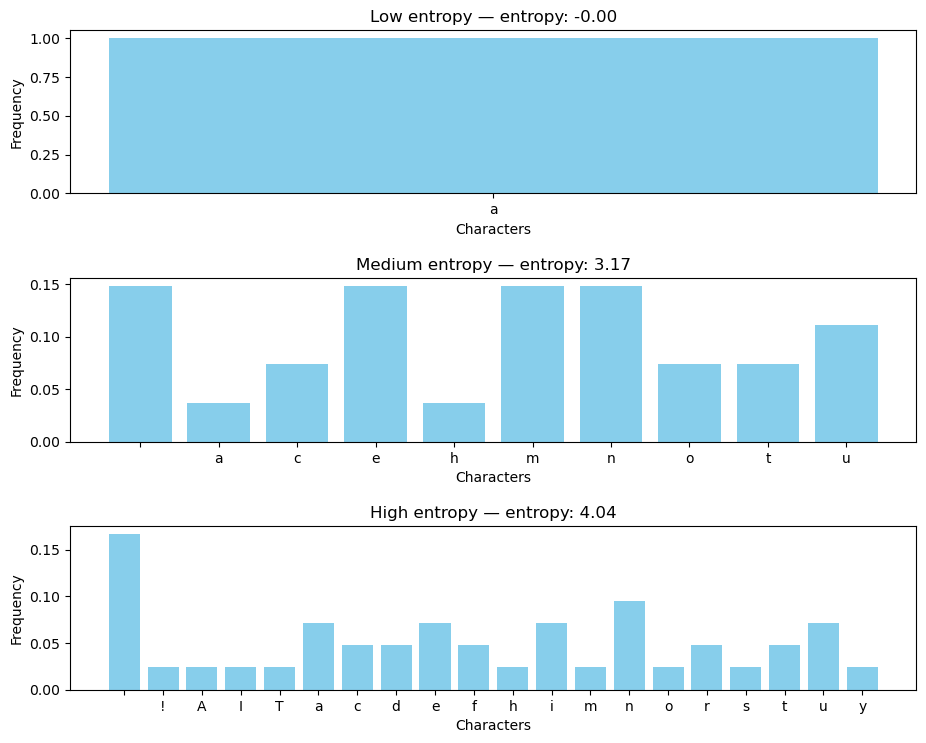

In [144]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import math

# Функция для расчёта энтропии по формуле Шеннона
def calculate_entropy(text):
    counter = Counter(text)
    total = len(text)
    entropy = -sum((count/total) * math.log2(count/total) for count in counter.values())
    return entropy, counter

# Примеры текстов
texts = {
    "Low entropy": "aaaaaaaaaaaaaaaaaaaaaaa",
    "Medium entropy": "menu menu contact home menu",
    "High entropy": "The future of AI is uncertain and dynamic!"
}

# Plotting
fig, axes = plt.subplots(len(texts), 1, figsize=(10, 8))
fig.tight_layout(pad=4)

for ax, (label, text) in zip(axes, texts.items()):
    entropy, counter = calculate_entropy(text)
    chars, freqs = zip(*sorted(counter.items()))
    freqs = np.array(freqs) / sum(freqs)

    ax.bar(chars, freqs, color='skyblue')
    ax.set_title(f"{label} — entropy: {entropy:.2f}")
    ax.set_ylabel("Frequency")
    ax.set_xlabel("Characters")

plt.show()



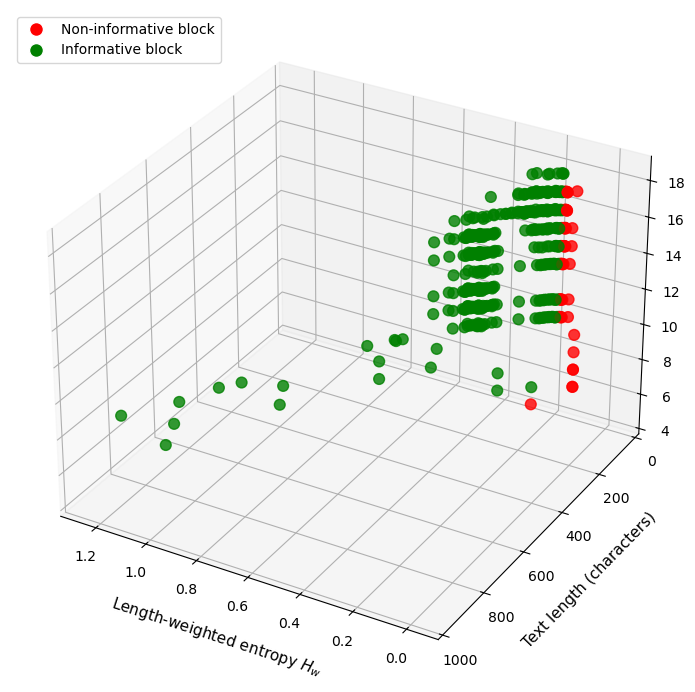

In [146]:
from pathlib import Path
from bs4 import BeautifulSoup, Tag
import pandas as pd
from collections import Counter
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D

# --- Load HTML file ---
URL = Path.home() / "ASA" / "BBC News.html"
with open(URL, "r", encoding="utf-8") as file:
    html = file.read()
soup = BeautifulSoup(html, 'html.parser')

# --- Compute DOM depth ---
def get_dom_depth(tag):
    depth = 0
    while tag.parent and isinstance(tag.parent, Tag):
        depth += 1
        tag = tag.parent
    return depth

# --- Shannon entropy ---
def entropy(text):
    if not text:
        return 0
    prob = [count / len(text) for count in Counter(text).values()]
    return -sum(p * math.log2(p) for p in prob)

# --- Heuristic labeling: whether a block is informative ---
def is_informative(tag):
    text = tag.get_text(strip=True)
    return int(len(text) > 50 and get_dom_depth(tag) > 5)

# --- Collect HTML elements ---
elements = soup.find_all(['p', 'div', 'span', 'li'])

# Precompute max text length
lengths = [len(el.get_text(strip=True)) for el in elements if len(el.get_text(strip=True)) >= 30]
max_length = max(lengths) if lengths else 1

alpha = 0.6  # length weighting coefficient

records = []
for el in elements:
    text = el.get_text(strip=True)
    length = len(text)
    if length < 30:
        continue
    raw_entropy = entropy(text)
    norm_length = length / max_length
    weighted_entropy = (norm_length ** alpha) * raw_entropy

    records.append({
        "Text": text,
        "Entropy": weighted_entropy,  # H_w
        "Text Length": length,
        "DOM Depth": get_dom_depth(el),
        "Informative": is_informative(el)
    })

# --- Convert to DataFrame ---
df = pd.DataFrame(records)
df = df[df["Text Length"] < 1000]

# --- Color by informativeness ---
colors = ["green" if i == 1 else "red" for i in df["Informative"]]

# --- 3D Plot ---
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    df["Entropy"],
    df["Text Length"],
    df["DOM Depth"],
    c=colors,
    s=60,
    alpha=0.8
)

# --- Axis labels ---
ax.set_xlabel("Length-weighted entropy $H_w$", fontsize=11, labelpad=10)
ax.set_ylabel("Text length (characters)", fontsize=11, labelpad=10)
ax.set_zlabel("DOM depth", fontsize=11, labelpad=10)

# --- View settings ---
ax.view_init(elev=30, azim=120)
ax.set_xlim(df["Entropy"].min() - 0.2, df["Entropy"].max() + 0.2)
ax.set_ylim(0, 1000)
ax.set_zlim(df["DOM Depth"].min() - 1, df["DOM Depth"].max() + 1)
ax.grid(True)

# --- Legend ---
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Non-informative block', markerfacecolor='red', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Informative block', markerfacecolor='green', markersize=10)
]
ax.legend(handles=legend_elements, loc="upper left", fontsize=10)

plt.tight_layout()
plt.subplots_adjust(left=0.08, right=0.92, top=0.92, bottom=0.08)
plt.show()
